In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [24]:
train_df.info() # Check to see whether any variables have missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [27]:
 train_df.isnull().sum() # Check for missing values in the dataset.

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [30]:
train_df.describe().T # Statistics summary

,count,mean,std,min,25%,50%,75%,max
id,90615.0,45307.000000,26158.441658,0.0000,22653.5000,45307.0000,67960.5000,90614.0000
Length,90615.0,0.517098,0.118217,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,90615.0,0.401679,0.098026,0.0550,0.3450,0.4250,0.4700,0.6500
Height,90615.0,0.135464,0.038008,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,90615.0,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight.1,90615.0,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.4880
Whole weight.2,90615.0,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.7600
Shell weight,90615.0,0.225898,0.130203,0.0015,0.1200,0.2250,0.3050,1.0050
Rings,90615.0,9.696794,3.176221,1.0000,8.0000,9.0000,11.0000,29.0000


In [35]:
'''This code determines which variables are categorical and which are numerical'''

categorical_col = train_df.select_dtypes(include=['object']).columns
print("Categorical variables:")
print(categorical_col)
numerical_col = train_df.select_dtypes(include=np.number).columns.tolist()
print("Numerical variables:")
print(numerical_col)

Categorical variables:
Index(['Sex'], dtype='object')
Numerical variables:
['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']


In [ ]:
'''EDA Univariate Analysis'''

# Note: Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

# Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

id
Skew: 0.0


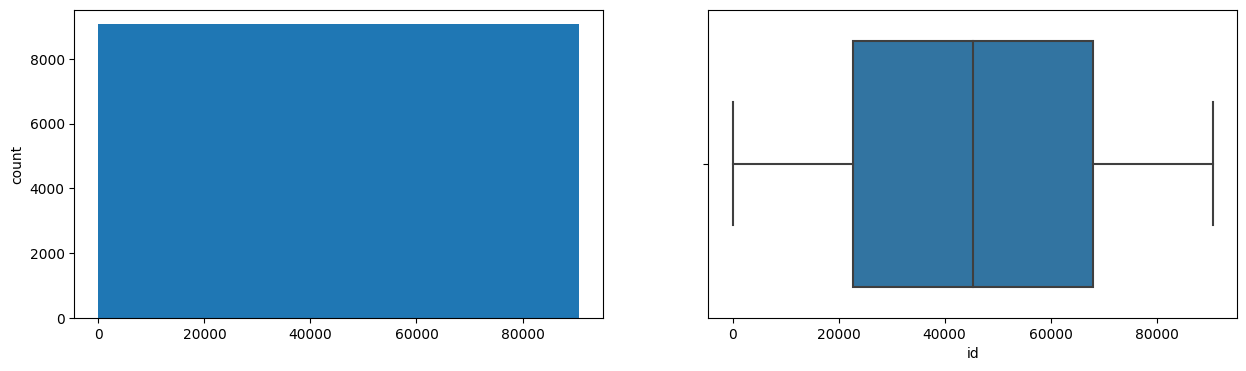

Length
Skew: -0.73


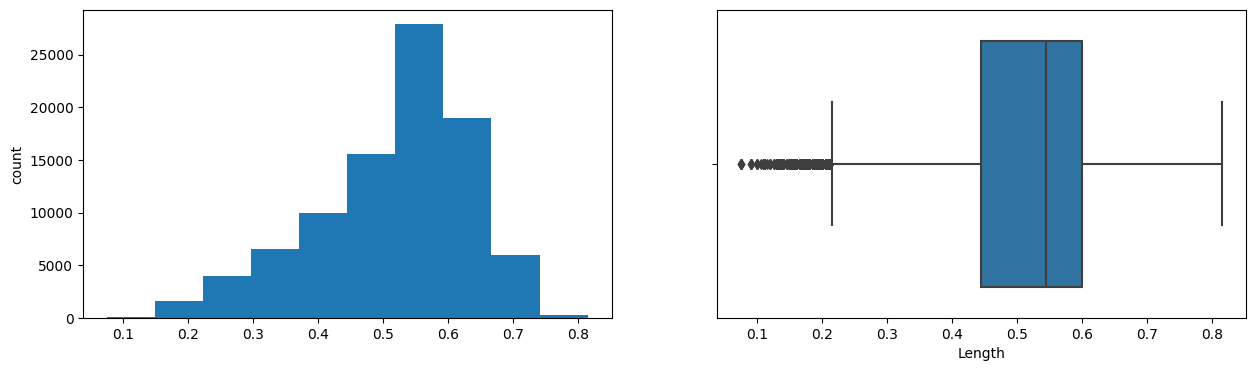

Diameter
Skew: -0.7


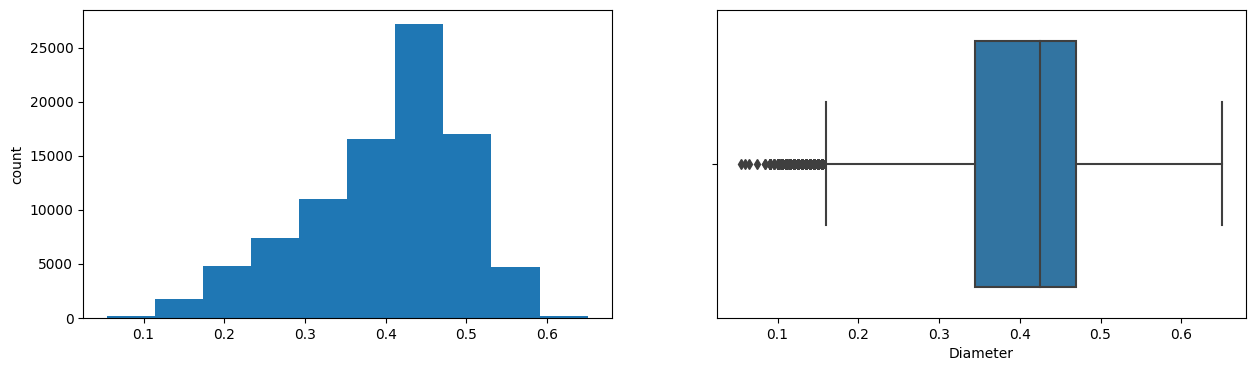

Height
Skew: 0.31


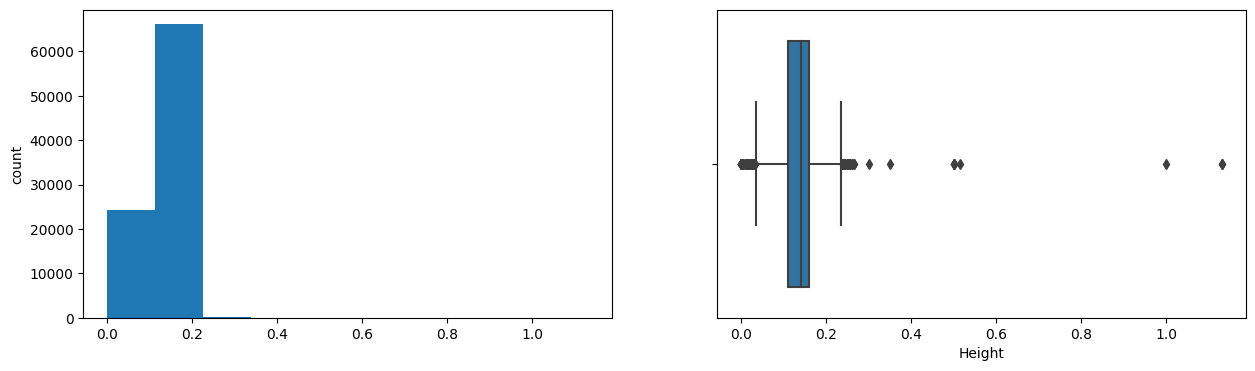

Whole weight
Skew: 0.43


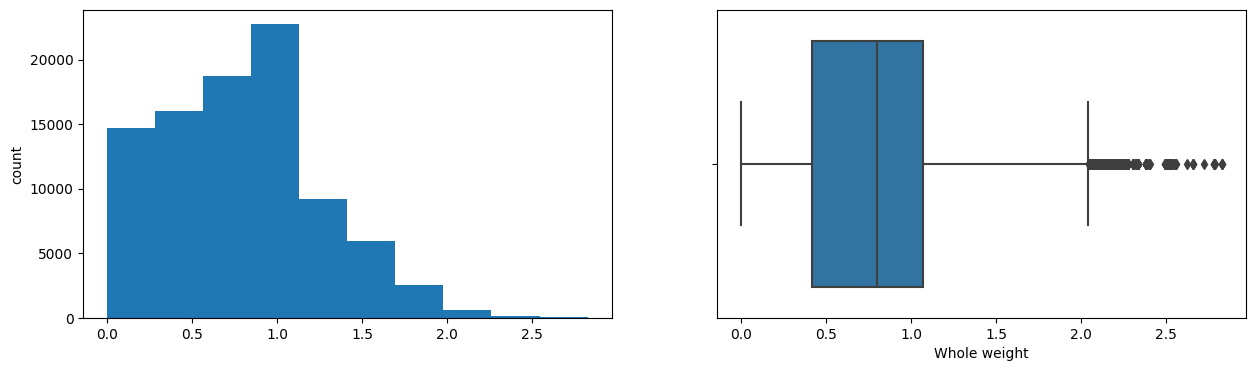

Whole weight.1
Skew: 0.59


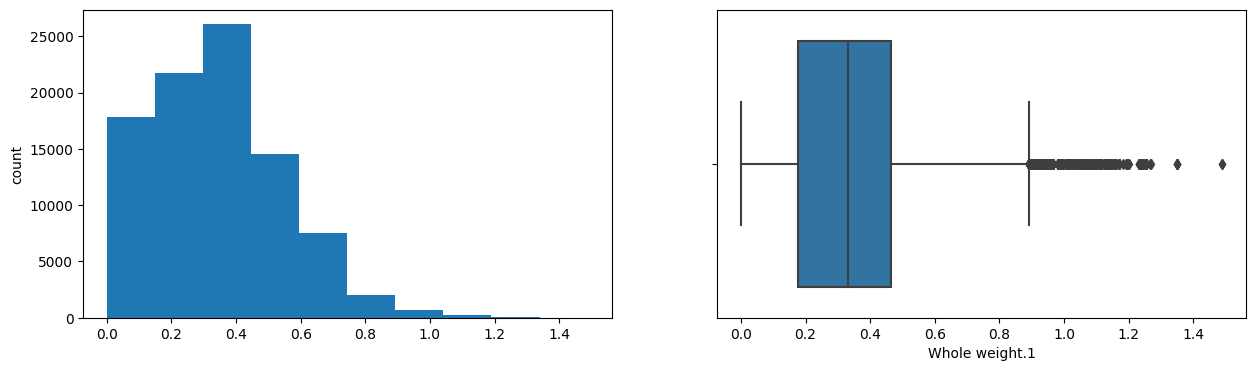

Whole weight.2
Skew: 0.48


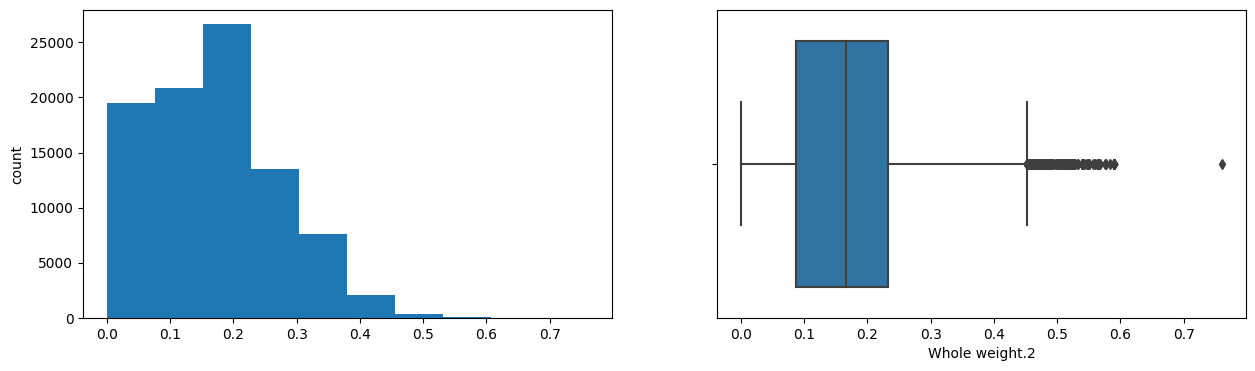

Shell weight
Skew: 0.48


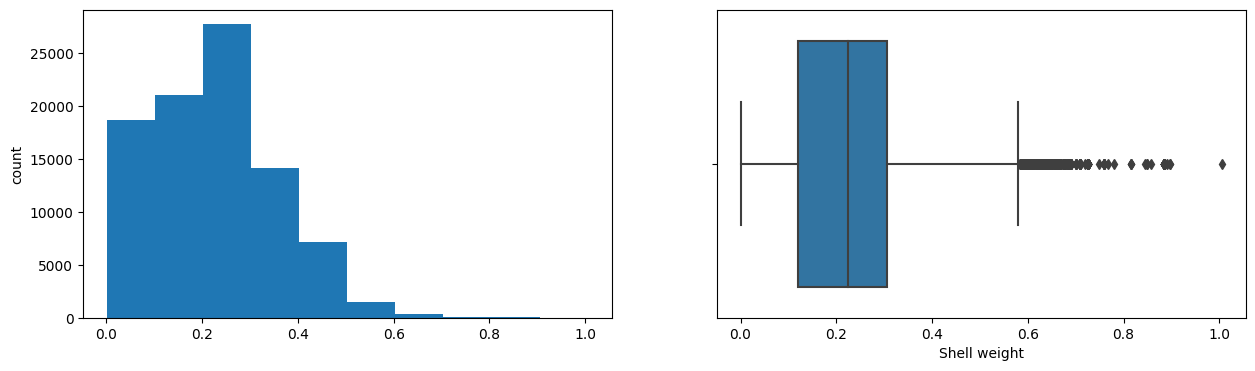

Rings
Skew: 1.2


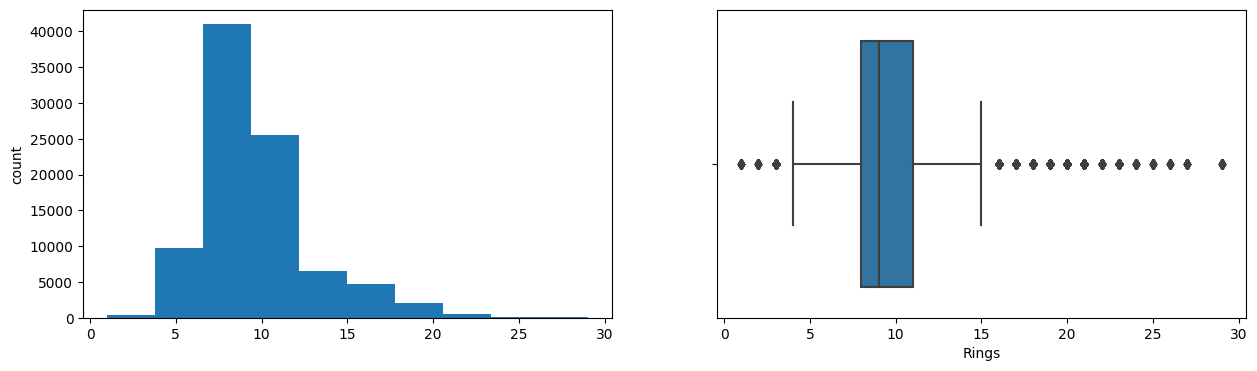

In [39]:
'''Underlying code creates distribution plots for each numerical variable. Note that this includes id,
even though it is not relevant here'''
for col in numerical_col:
    print(col)
    print('Skew:', round(train_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col])
    plt.show()

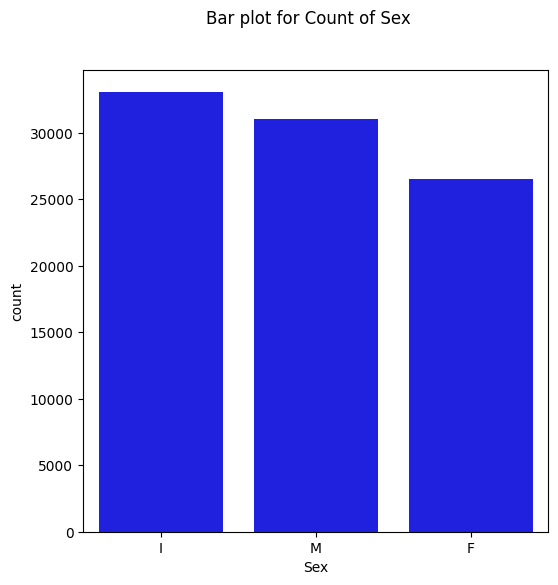

In [52]:
'''Underlying code visualizes count of sex'''

fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle('Bar plot for Count of Sex')
sns.countplot(ax = axes, x = 'Sex', data = train_df, color = 'blue', 
              order = train_df['Sex'].value_counts().index);


In [3]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")

test_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [4]:
# Average number of rings in the training dataset
train_df['Rings'].mean()

9.696794129007339

In [5]:
test_df['Rings'] = pd.Series([train_df['Rings'].mean()] * len(train_df))
test_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,9.696794
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.696794
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.696794
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,9.696794
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,9.696794
...,...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,9.696794
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,9.696794
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,9.696794
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,9.696794


In [6]:
# Output to CSV
# test_df[['id', 'Rings']].to_csv('average_prediction.csv', index=False)

In [7]:
from copy import deepcopy

train_df_sub = deepcopy(train_df[['Length', 'Height', 'Rings']])

train_df_sub

,Length,Height,Rings
0,0.550,0.150,11
1,0.630,0.145,11
2,0.160,0.025,6
3,0.595,0.150,10
4,0.555,0.130,9
...,...,...,...
90610,0.335,0.075,6
90611,0.555,0.150,9
90612,0.435,0.095,6
90613,0.345,0.075,6


In [8]:
X_train, Y_train = train_df_sub.to_numpy()[:, :-1], train_df_sub.to_numpy()[:,-1]
Y_train

array([11., 11.,  6., ...,  6.,  6.,  8.])

In [9]:
train_df_sub = train_df_sub.fillna(train_df_sub.mean())

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, Y_train)

lr

LinearRegression()

In [11]:
lr.coef_

array([ 2.31893795, 49.02979175])

In [12]:
lr.intercept_

1.8559004824843823

In [13]:
train_df_sub['linear_pred'] = lr.predict(X_train)
train_df_sub

,Length,Height,Rings,linear_pred
0,0.550,0.150,11,10.485785
1,0.630,0.145,11,10.426151
2,0.160,0.025,6,3.452675
3,0.595,0.150,10,10.590137
4,0.555,0.130,9,9.516784
...,...,...,...,...
90610,0.335,0.075,6,6.309979
90611,0.555,0.150,9,10.497380
90612,0.435,0.095,6,7.522469
90613,0.345,0.075,6,6.333168


In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(train_df_sub['Rings'], train_df_sub['linear_pred'])

1.6348235680023568

In [15]:
test_df_sub = deepcopy(test_df[['Length', 'Height']])

test_df_sub

,Length,Height
0,0.645,0.155
1,0.580,0.160
2,0.560,0.140
3,0.570,0.145
4,0.415,0.110
...,...,...
60406,0.345,0.085
60407,0.525,0.145
60408,0.590,0.155
60409,0.660,0.190


In [16]:
test_df_sub = test_df_sub.fillna(test_df_sub.mean())
test_df_sub

,Length,Height
0,0.645,0.155
1,0.580,0.160
2,0.560,0.140
3,0.570,0.145
4,0.415,0.110
...,...,...
60406,0.345,0.085
60407,0.525,0.145
60408,0.590,0.155
60409,0.660,0.190


In [17]:
X_test = test_df_sub.to_numpy()
X_test

array([[0.645, 0.155],
       [0.58 , 0.16 ],
       [0.56 , 0.14 ],
       ...,
       [0.59 , 0.155],
       [0.66 , 0.19 ],
       [0.43 , 0.12 ]])

In [18]:
test_df['Linearpred'] = lr.predict(X_test)
test_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Linearpred
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,9.696794,10.951233
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.696794,11.045651
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.696794,10.018677
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,9.696794,10.287015
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,9.696794,8.211537
...,...,...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,9.696794,6.823466
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,9.696794,10.182663
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,9.696794,10.823692
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,9.696794,12.702060


In [19]:
# Output to CSV
test_df[['id', 'Linearpred']].to_csv('linearpred_prediction.csv', index=False)